In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [91]:
import os
os.getcwd()


'C:\\Users\\Omkar\\Desktop\\Hackathon'

In [92]:
os.chdir('C:/Users/Omkar/Desktop/Hackathon')

In [93]:
os.getcwd()


'C:\\Users\\Omkar\\Desktop\\Hackathon'

In [94]:
df = pd.read_csv('Train.csv')

In [95]:
df.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [96]:
df.shape

(15000, 40)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              6387 non-null float64
dc_cons_may              7153 non-null float64
dc_cons_jun              5334 non-null float64
cc_count_apr             13915 non-null float64
cc_count_may             14470 non-null float64
cc_count_jun             14256 non-null float64
dc_count_apr             6387 non-null float64
dc_count_may             7153 non-null float64
dc_count_jun             7890 non-null float64
card_lim                 14991 non-null float64
personal_loan_active     1259 non-null float64
vehicle_loan_active      389 non-null float64
personal_loan_closed     1253 non-null float64
vehicle_loan_closed      711 non-null float

In [98]:
df.dtypes

ID                         int64
account_type              object
gender                    object
age                        int64
region_code              float64
dc_cons_apr              float64
dc_cons_may              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_cou

In [99]:
df.set_index('ID',inplace = True)

In [100]:
def missing_data(dataset):
    total = df.isnull().sum().sort_values(ascending= False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis =1, keys =['Total','Percent'])
    return missing_data

null_values = missing_data(df)
print(null_values)

                       Total    Percent
investment_4           14815  98.766667
loan_enq               14734  98.226667
vehicle_loan_active    14611  97.406667
investment_3           14381  95.873333
investment_1           14357  95.713333
vehicle_loan_closed    14289  95.260000
investment_2           13904  92.693333
personal_loan_closed   13747  91.646667
personal_loan_active   13741  91.606667
dc_cons_jun             9666  64.440000
dc_count_apr            8613  57.420000
dc_cons_apr             8613  57.420000
dc_count_may            7847  52.313333
dc_cons_may             7847  52.313333
dc_count_jun            7110  47.400000
credit_amount_apr       1485   9.900000
max_credit_amount_apr   1483   9.886667
credit_amount_may       1478   9.853333
max_credit_amount_may   1478   9.853333
cc_count_apr            1085   7.233333
debit_amount_may         996   6.640000
debit_amount_jun         948   6.320000
debit_count_may          885   5.900000
credit_count_may         885   5.900000


In [101]:
drop = null_values[null_values > 90].dropna().index
drop

Index(['investment_4', 'loan_enq', 'vehicle_loan_active', 'investment_3',
       'investment_1', 'vehicle_loan_closed', 'investment_2',
       'personal_loan_closed', 'personal_loan_active'],
      dtype='object')

In [102]:
df.drop(drop,axis =1,inplace = True)

In [103]:
df.shape

(15000, 30)

In [104]:
df.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,1946.0
17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,66784.0
7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,14469.0
1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,6494.0
16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,14588.0


In [105]:
df.isnull().sum().sort_values(ascending =False)

dc_cons_jun              9666
dc_cons_apr              8613
dc_count_apr             8613
dc_count_may             7847
dc_cons_may              7847
dc_count_jun             7110
credit_amount_apr        1485
max_credit_amount_apr    1483
credit_amount_may        1478
max_credit_amount_may    1478
cc_count_apr             1085
debit_amount_may          996
debit_amount_jun          948
credit_count_may          885
debit_count_may           885
credit_count_apr          776
debit_count_apr           751
cc_count_jun              744
max_credit_amount_jun     671
credit_amount_jun         671
debit_count_jun           658
credit_count_jun          657
debit_amount_apr          644
cc_count_may              530
card_lim                    9
age                         0
gender                      0
cc_cons                     0
region_code                 0
account_type                0
dtype: int64

In [106]:
df.dc_cons_apr.mean()

10923.114016661466

In [107]:
df.dc_cons_apr.median()

9704.319536632756

In [108]:
df.dc_cons_apr.std()

11056.411333671167

In [147]:
df.cc_count_apr.value_counts().head(20)

1.0     1488
2.0     1290
3.0     1169
4.0     1032
5.0      980
6.0      842
7.0      781
8.0      736
9.0      681
10.0     580
11.0     537
12.0     458
13.0     413
15.0     315
14.0     300
16.0     286
17.0     243
18.0     192
19.0     184
20.0     161
Name: cc_count_apr, dtype: int64

In [159]:
df.debit_count_apr.value_counts().head(20)

2.0     599
6.0     590
4.0     571
7.0     568
1.0     568
3.0     557
14.0    557
13.0    556
12.0    551
8.0     543
10.0    540
5.0     538
11.0    531
9.0     521
19.0    443
15.0    437
18.0    433
20.0    421
16.0    399
21.0    395
Name: debit_count_apr, dtype: int64

In [125]:
df_copy = df.fillna(0)
print(df_copy.shape)

(15000, 30)


In [126]:
df_dropna = df.dropna()
print(df_dropna.shape)

(2733, 30)


In [117]:
df_copy.isnull().sum()

account_type             0
gender                   0
age                      0
region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
cc_cons                  0
dtype: int64

In [129]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df_dropna)

,Feature,Number of Outliers
0,age,114
1,region_code,0
2,dc_cons_apr,105
3,dc_cons_may,33
4,dc_cons_jun,108
5,cc_count_apr,143
6,cc_count_may,137
7,cc_count_jun,76
8,dc_count_apr,164
9,dc_count_may,155


In [164]:
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(16,8))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)


In [ ]:
plot_continuous_columns(df_dropna)  

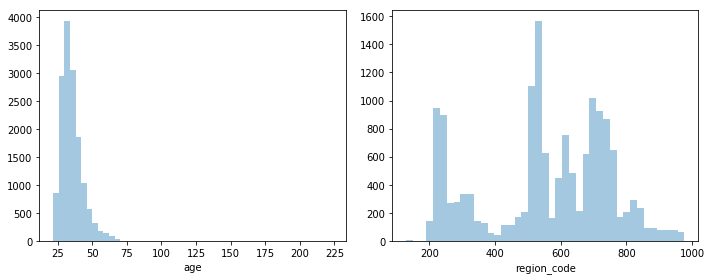

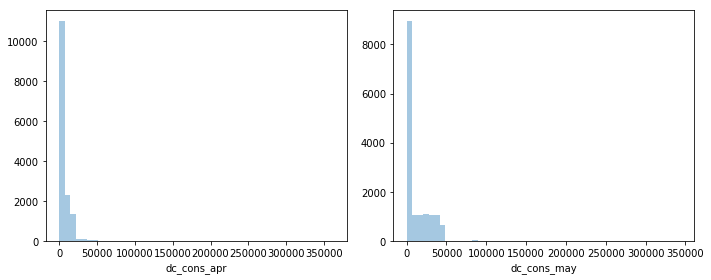

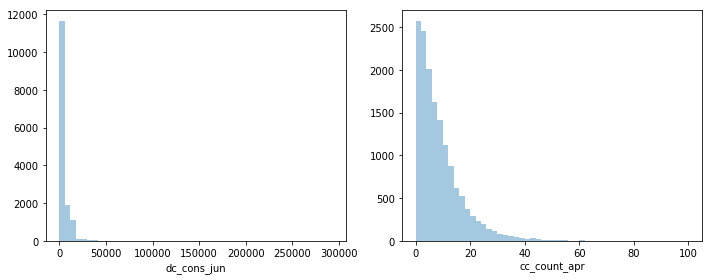

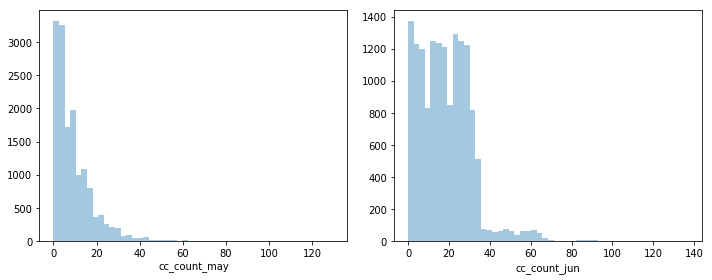

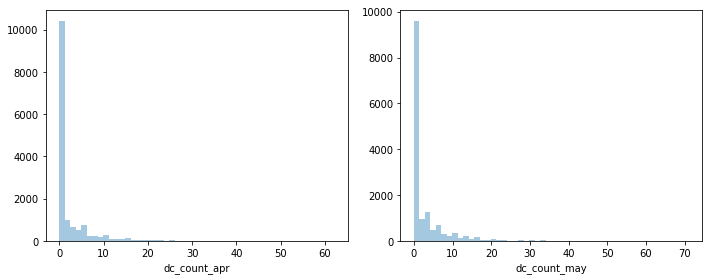

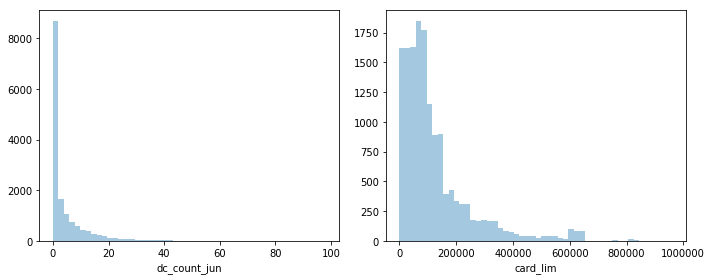

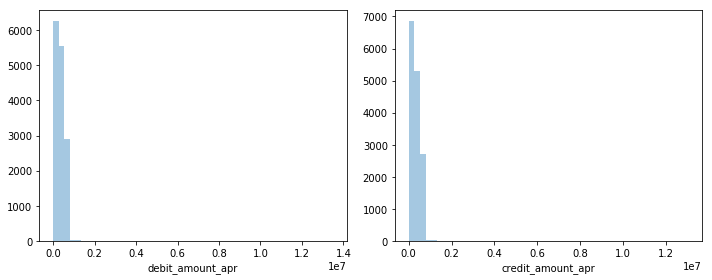

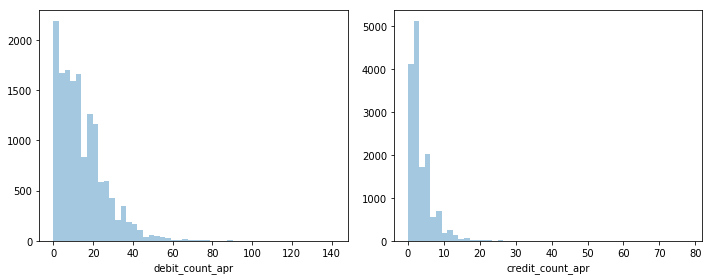

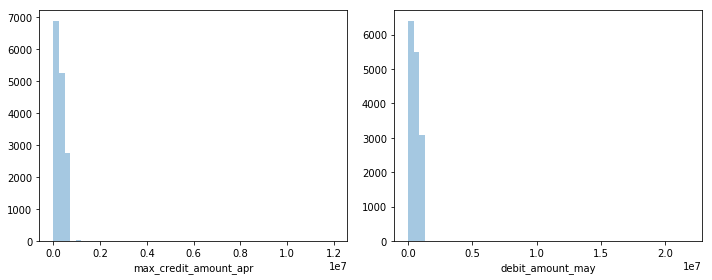

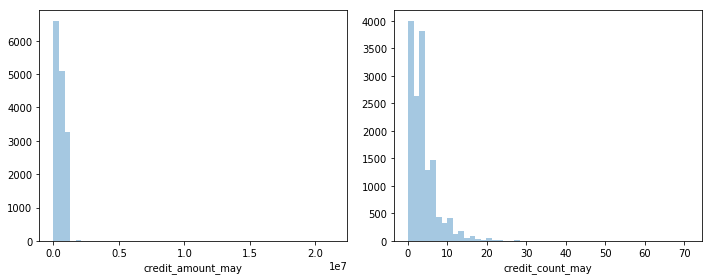

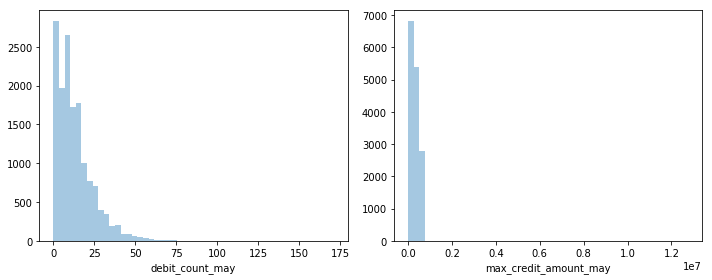

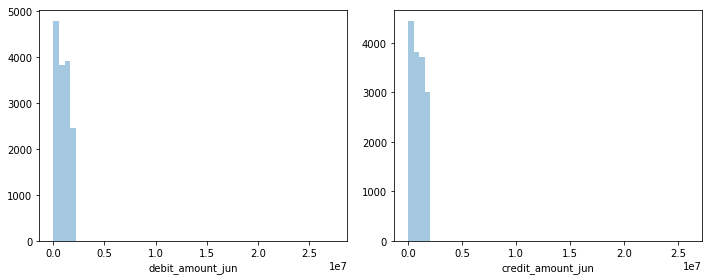

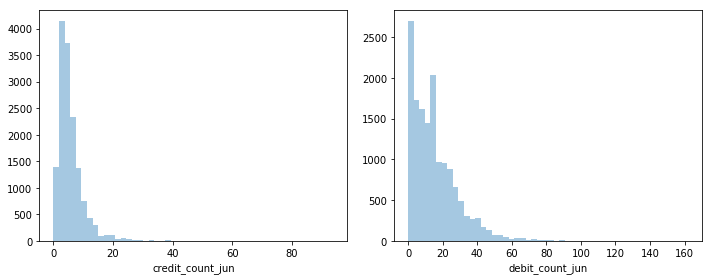

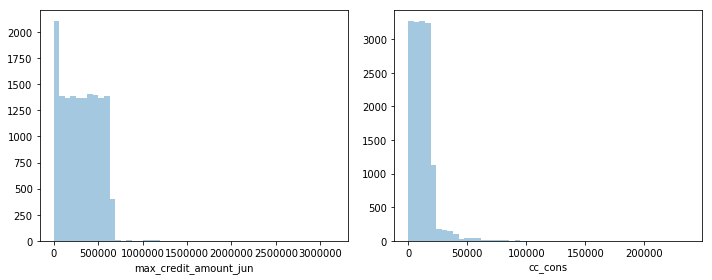

In [152]:
plot_continuous_columns(df_copy)

In [175]:
df_fill_missing = df 

In [176]:
df_fill_missing.dc_cons_apr = df.dc_cons_apr.fillna(df.dc_cons_apr.median())
df_fill_missing.dc_cons_may = df.dc_cons_may.fillna(df.dc_cons_may.median())
df_fill_missing.dc_cons_jun = df.dc_cons_jun.fillna(df.dc_cons_jun.median())
df_fill_missing.dc_count_apr = df.dc_count_apr.fillna(df.dc_count_apr.mode()[0])
df_fill_missing.dc_count_may =  df.dc_count_may.fillna(df.dc_count_may.mode()[0])
df_fill_missing.dc_count_jun =  df.dc_count_jun.fillna(df.dc_count_jun.mode()[0])
df_fill_missing.cc_count_apr = df.cc_count_apr.fillna(df.cc_count_apr.mode()[0])
df_fill_missing.cc_count_may =  df.cc_count_may.fillna(df.cc_count_may.mode()[0])
df_fill_missing.cc_count_jun =  df.cc_count_jun.fillna(df.cc_count_jun.mode()[0])
df_fill_missing.debit_count_apr =  df.debit_count_apr.fillna(df.debit_count_apr.mode()[0])
df_fill_missing.debit_count_may =  df.debit_count_may.fillna(df.debit_count_may.mode()[0])
df_fill_missing.debit_count_jun =  df.debit_count_jun.fillna(df.debit_count_jun.mode()[0])
df_fill_missing.credit_count_apr =  df.credit_count_apr.fillna(df.credit_count_apr.mode()[0])
df_fill_missing.credit_count_may =  df.credit_count_may.fillna(df.credit_count_may.mode()[0])
df_fill_missing.credit_count_jun =  df.credit_count_jun.fillna(df.credit_count_jun.mode()[0])
df_fill_missing.card_lim = df.card_lim.fillna(df.card_lim.median())
df_fill_missing.credit_amount_apr = df.credit_amount_apr.fillna(df.credit_amount_apr.median())
df_fill_missing.credit_amount_may = df.credit_amount_may.fillna(df.credit_amount_may.median())
df_fill_missing.credit_amount_jun = df.credit_amount_jun.fillna(df.credit_amount_jun.median())
df_fill_missing.debit_amount_apr = df.debit_amount_apr.fillna(df.debit_amount_apr.median())
df_fill_missing.debit_amount_may = df.debit_amount_may.fillna(df.debit_amount_may.median())
df_fill_missing.debit_amount_jun = df.debit_amount_jun.fillna(df.debit_amount_jun.median())
df_fill_missing.max_credit_amount_apr = df.max_credit_amount_apr.fillna(df.max_credit_amount_apr.median())
df_fill_missing.max_credit_amount_may = df.max_credit_amount_may.fillna(df.max_credit_amount_may.median())
df_fill_missing.max_credit_amount_jun = df.max_credit_amount_jun.fillna(df.max_credit_amount_jun.median())

In [177]:
df_fill_missing.isnull().sum().sort_values(ascending = False)

cc_cons                  0
max_credit_amount_jun    0
gender                   0
age                      0
region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
account_type             0
dtype: int64

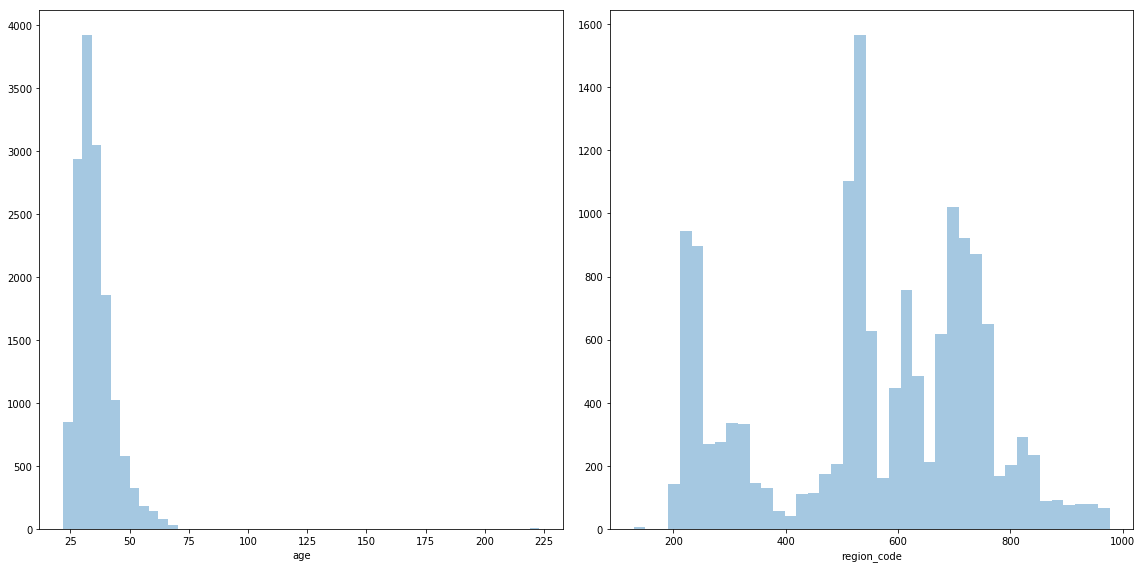

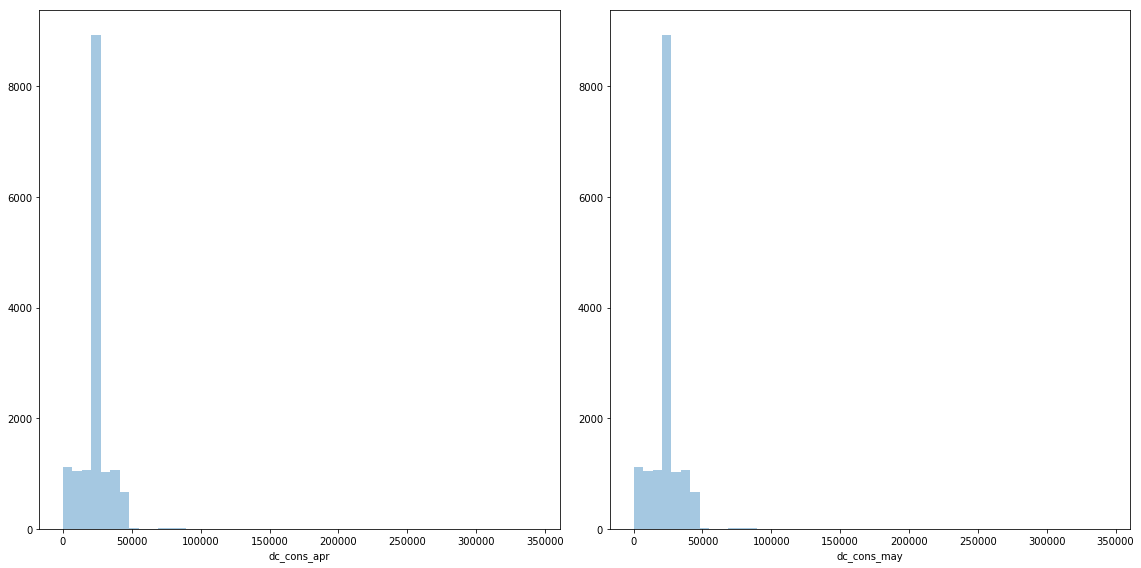

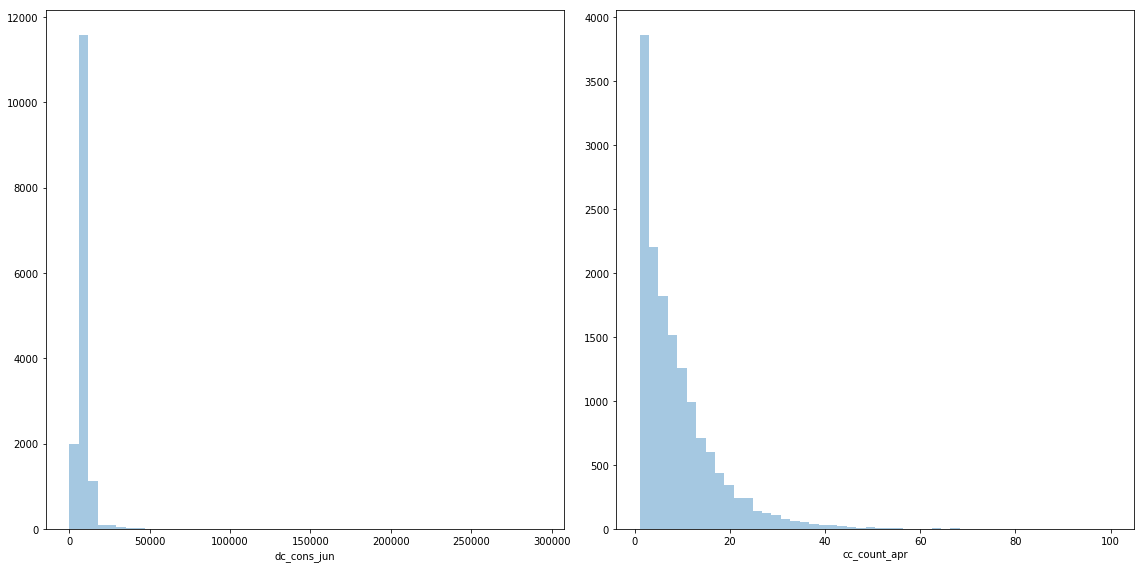

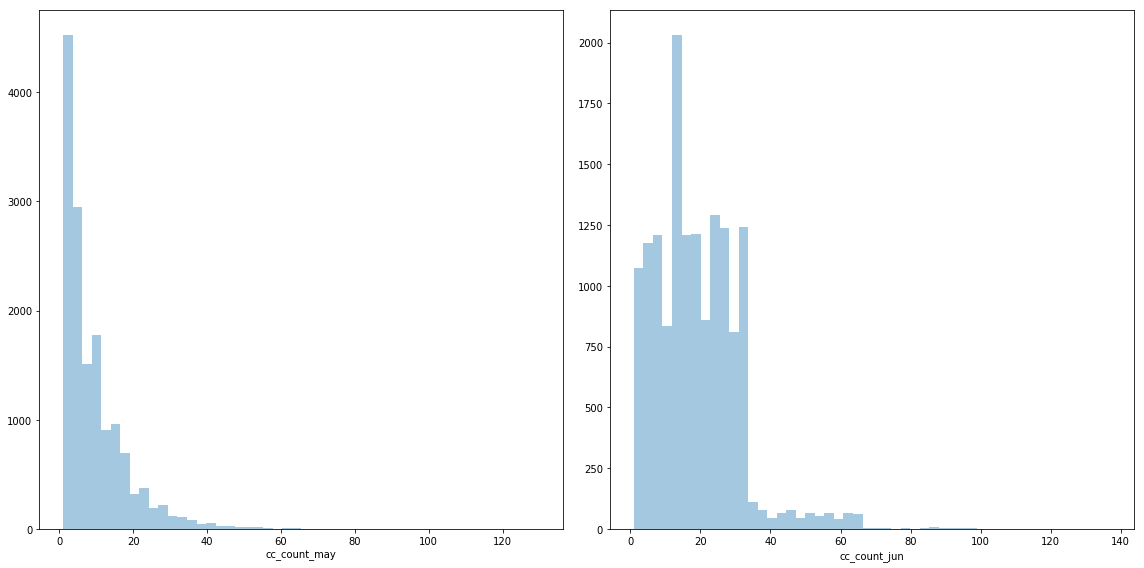

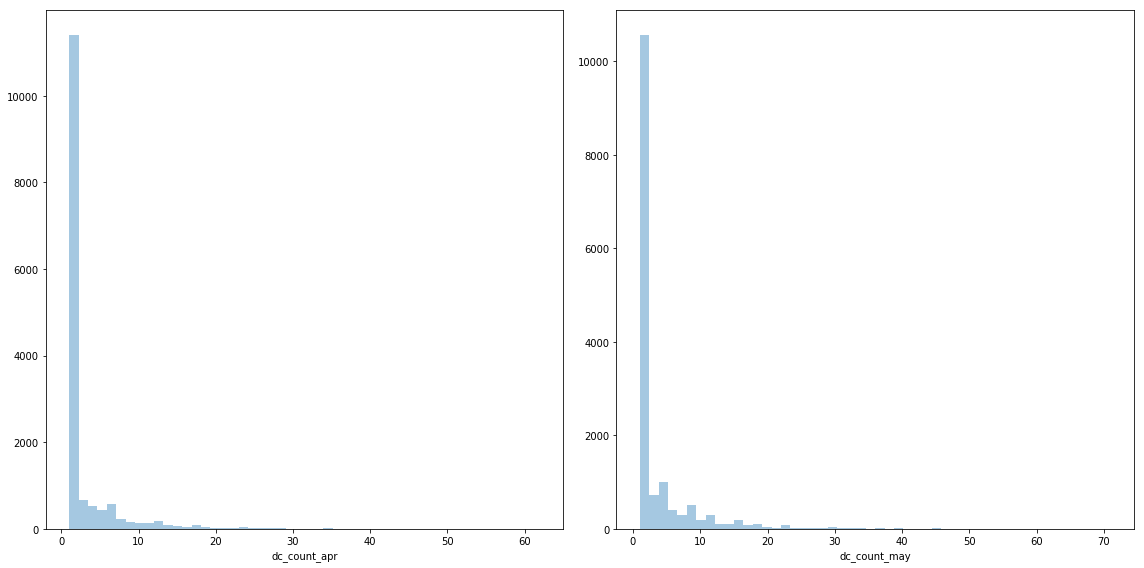

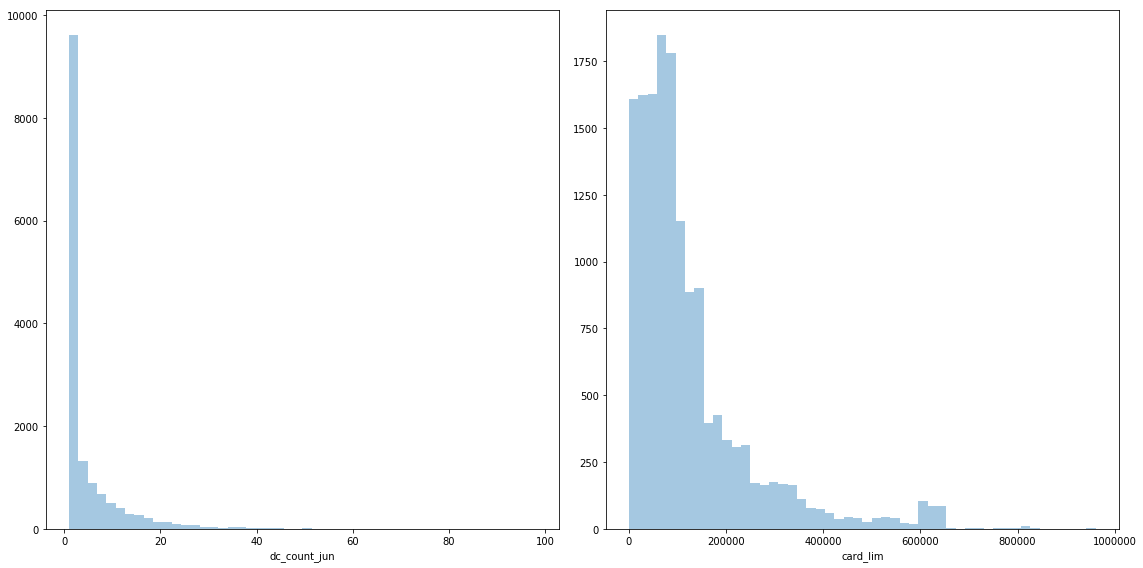

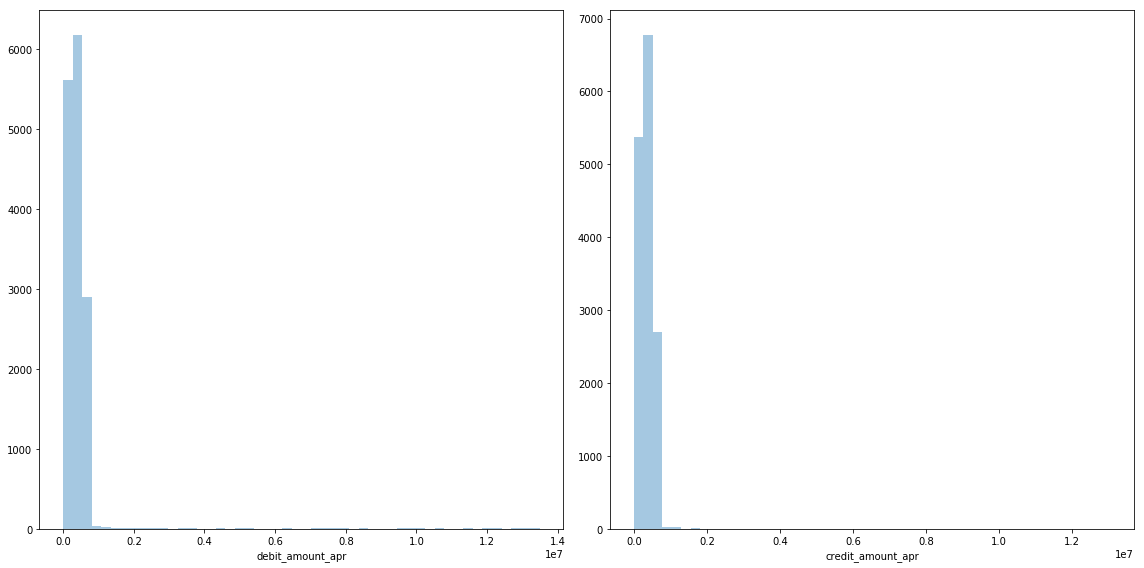

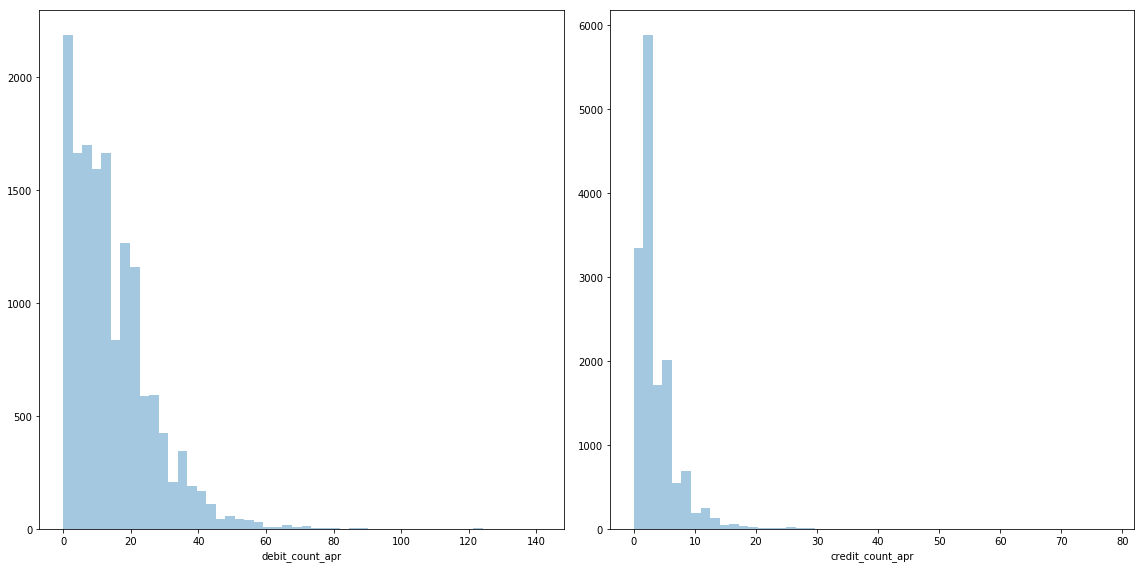

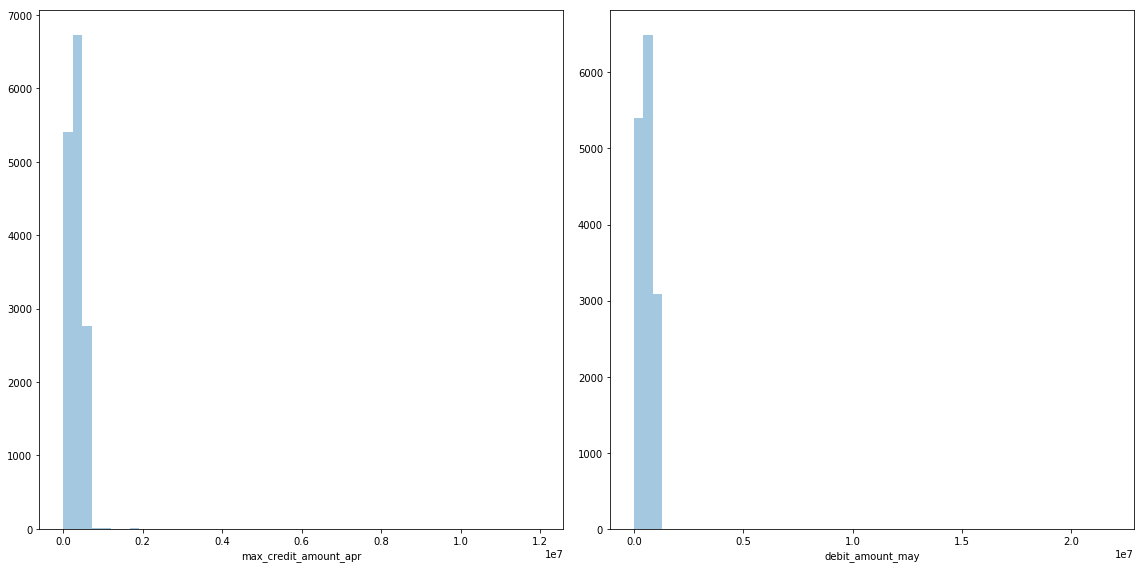

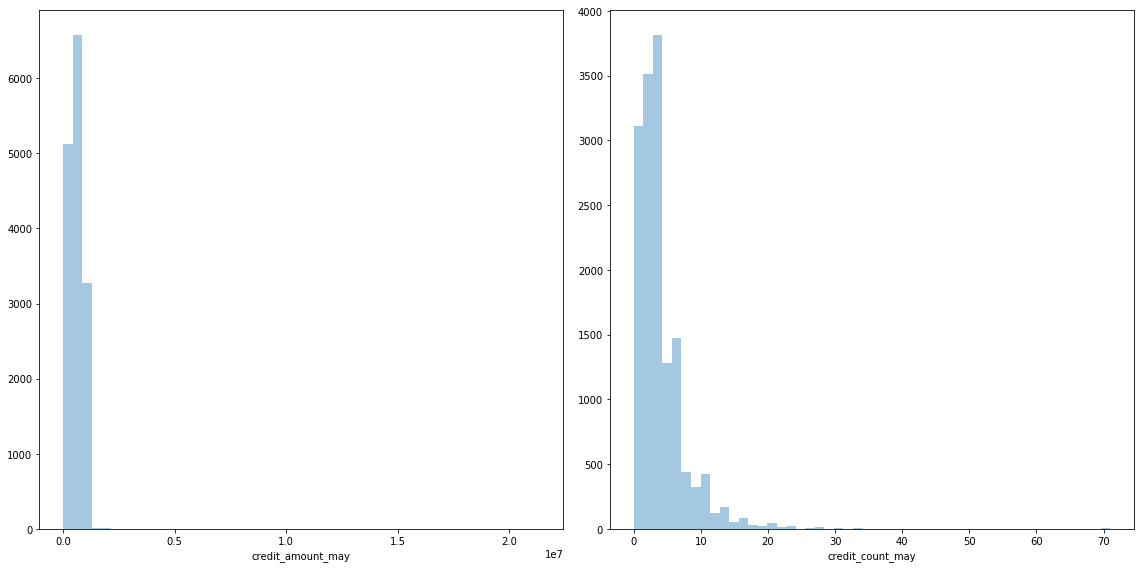

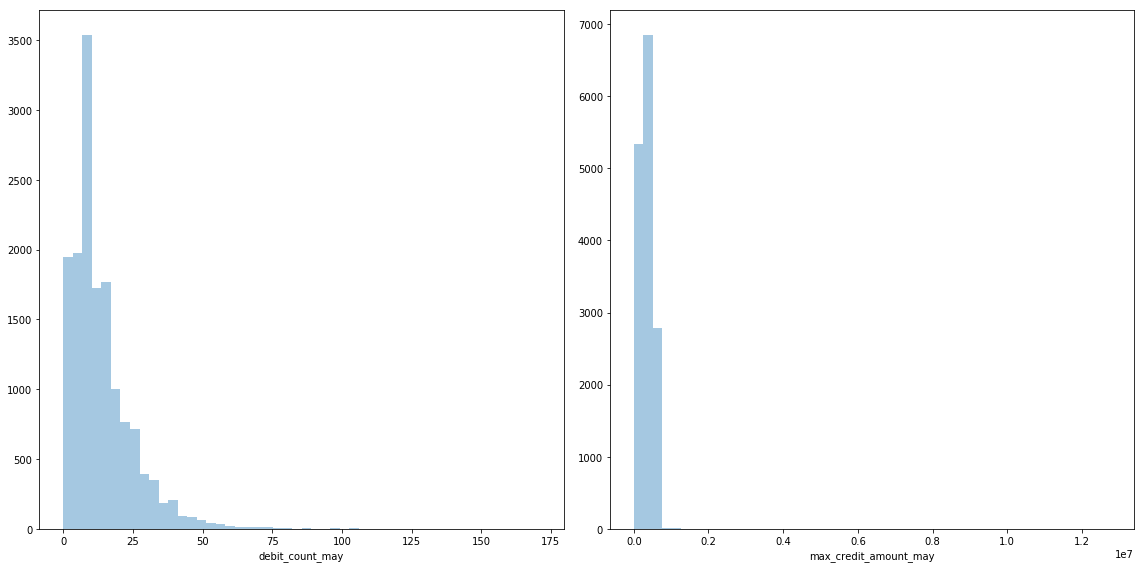

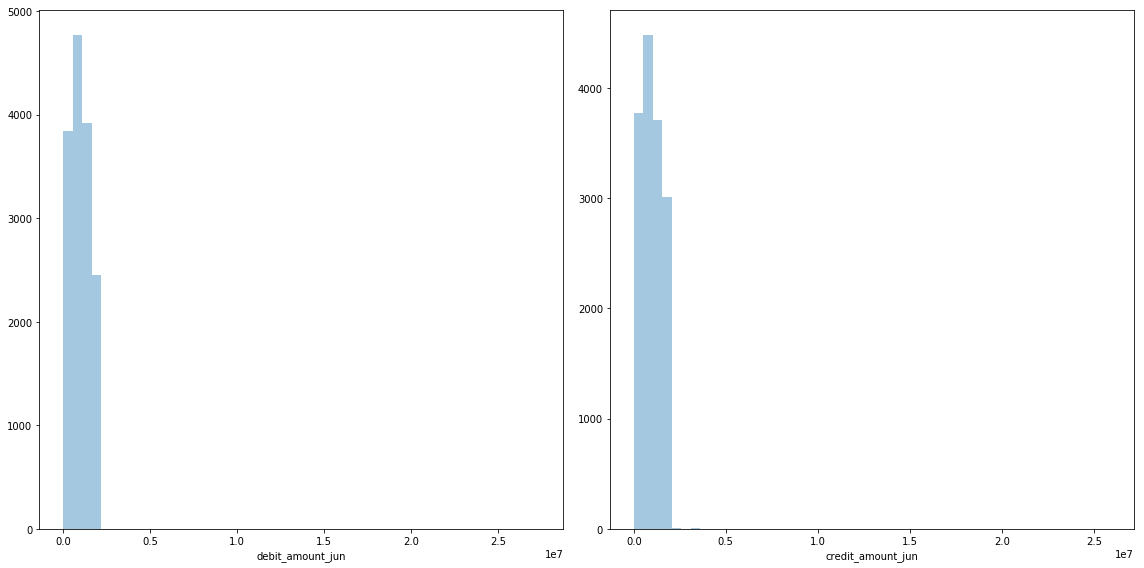

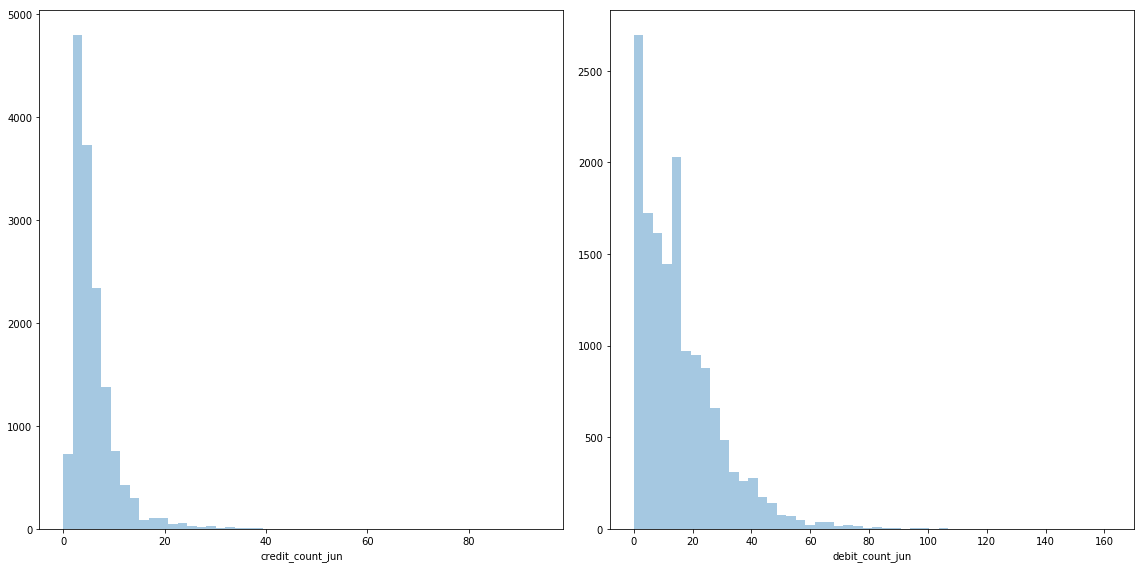

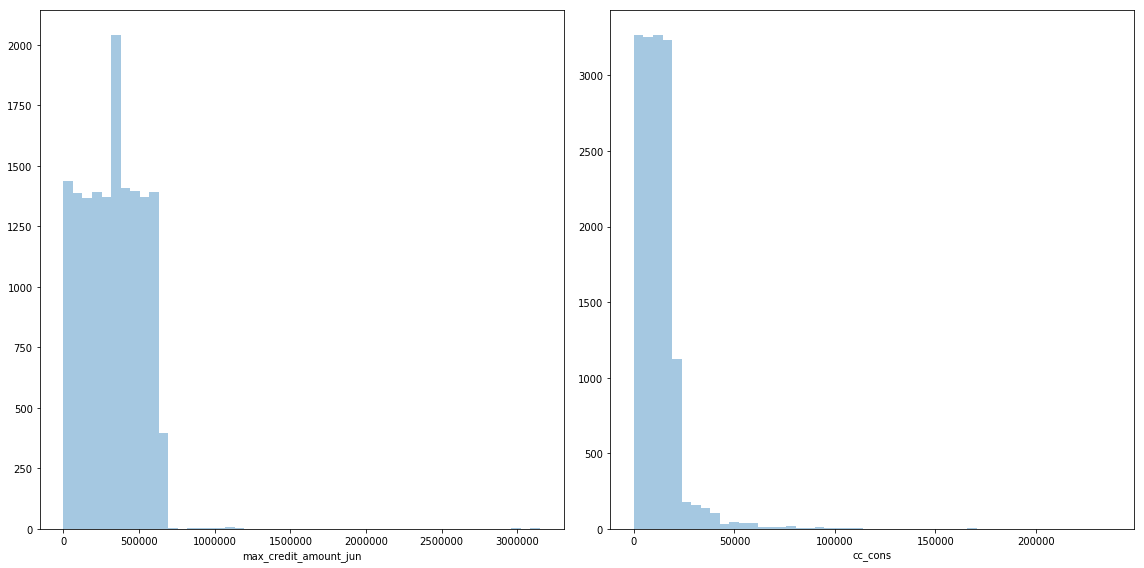

In [165]:
plot_continuous_columns(df_fill_missing)

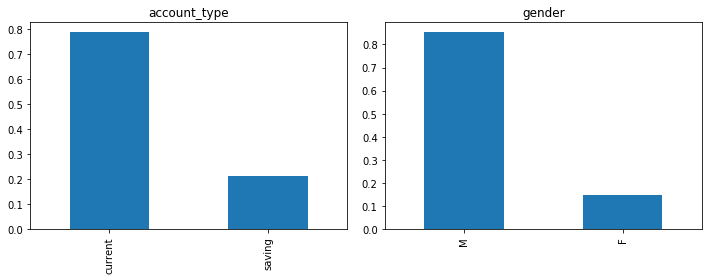

In [167]:

# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
        
        
plot = plot_categorical_columns(df)

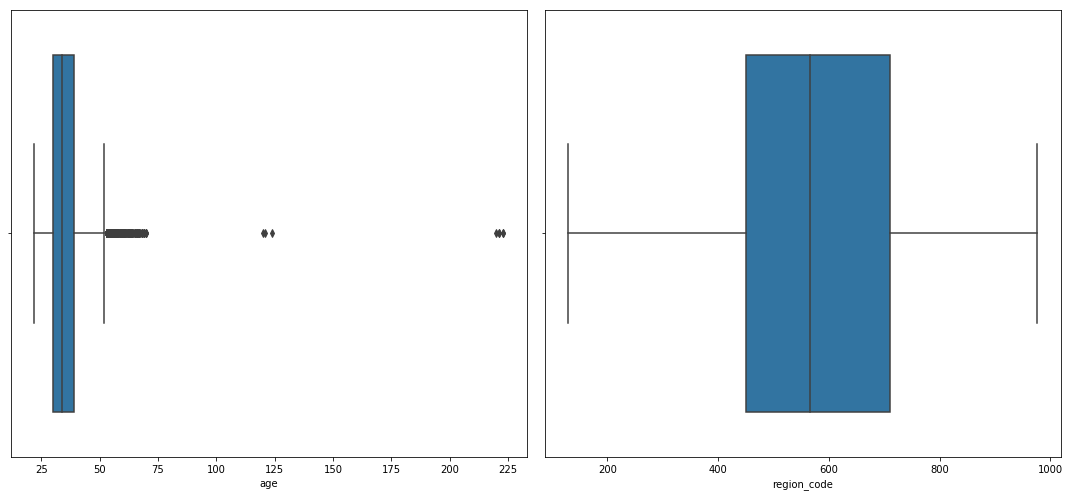

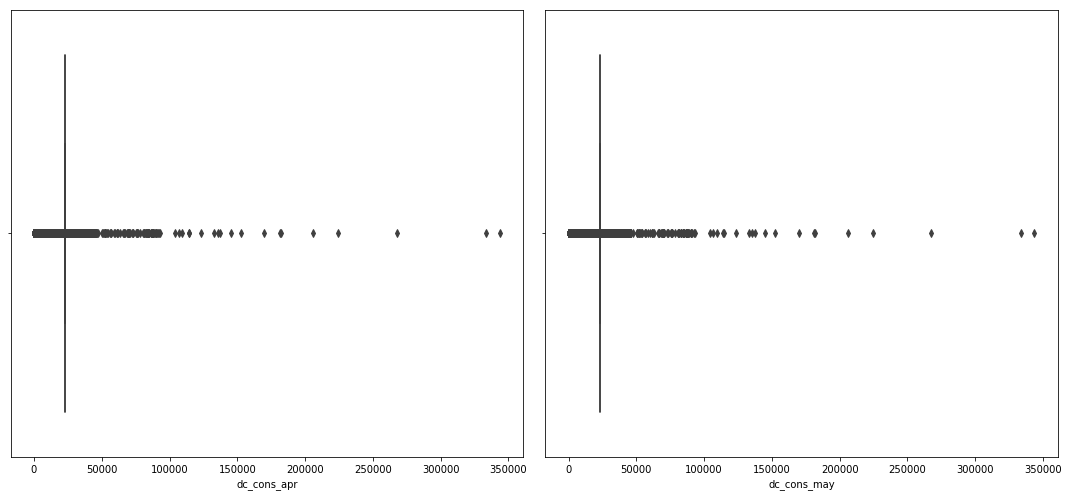

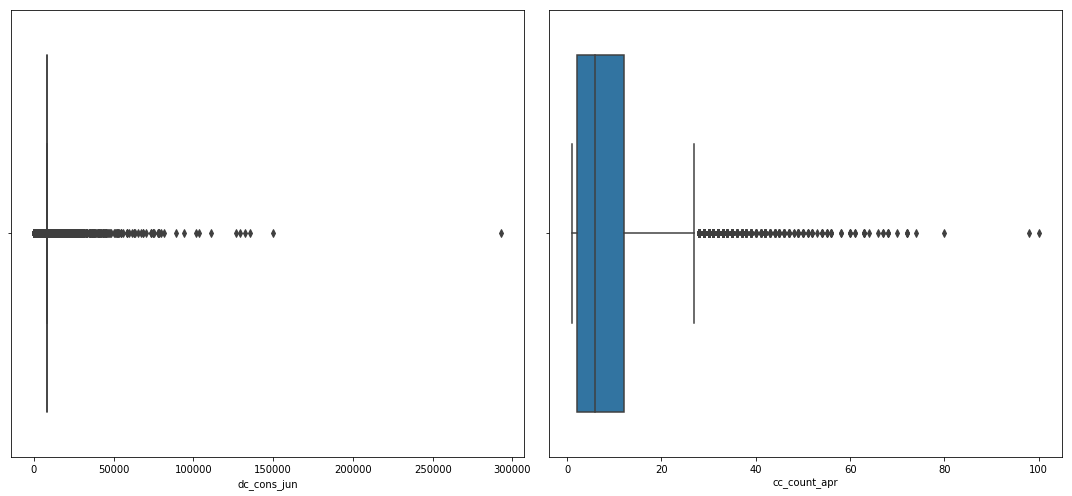

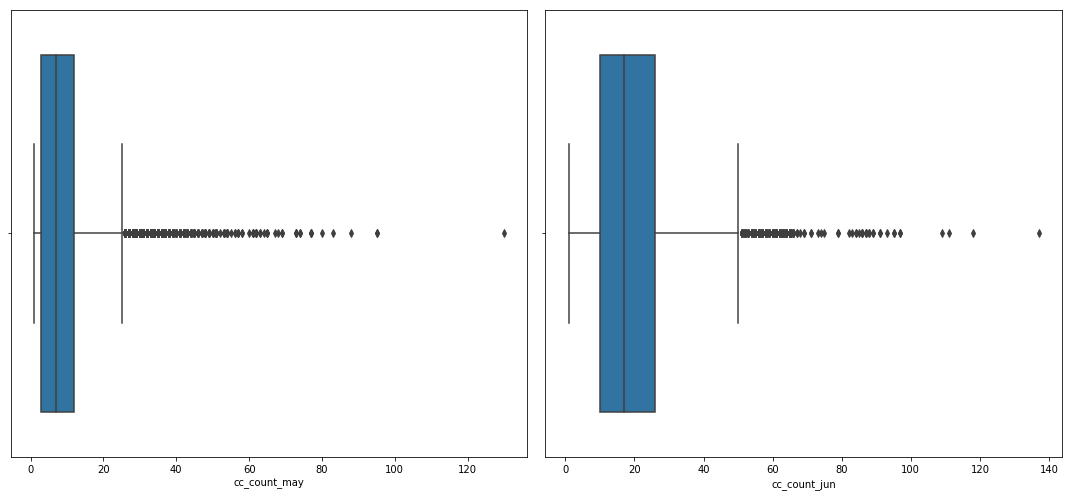

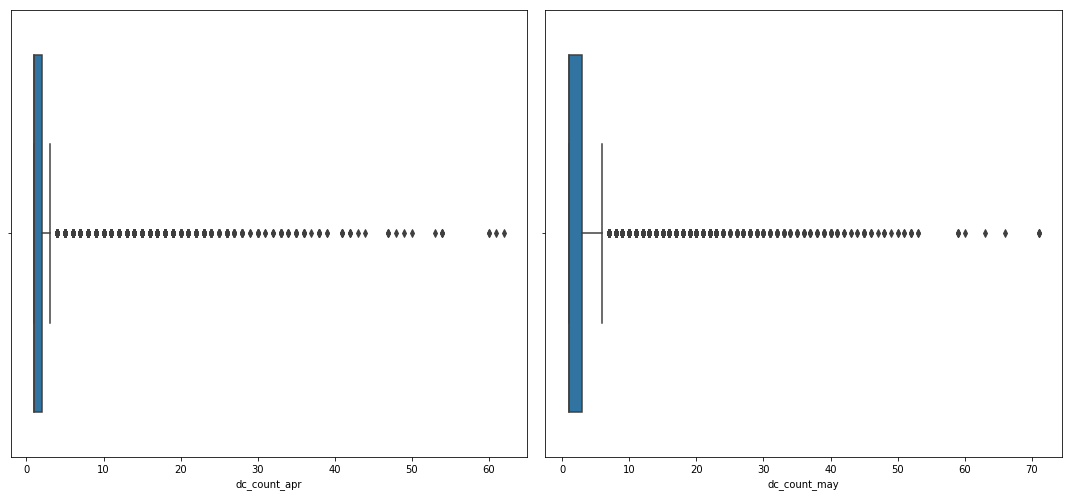

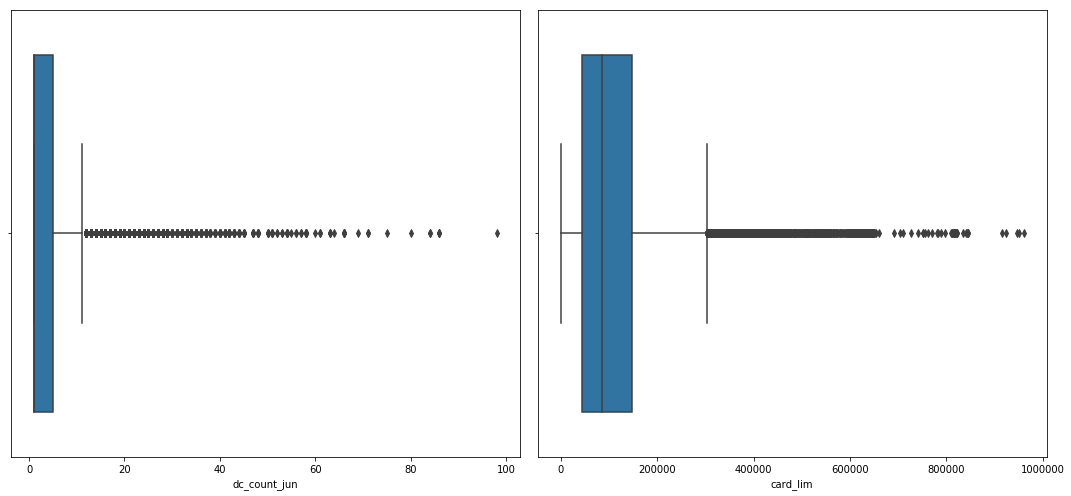

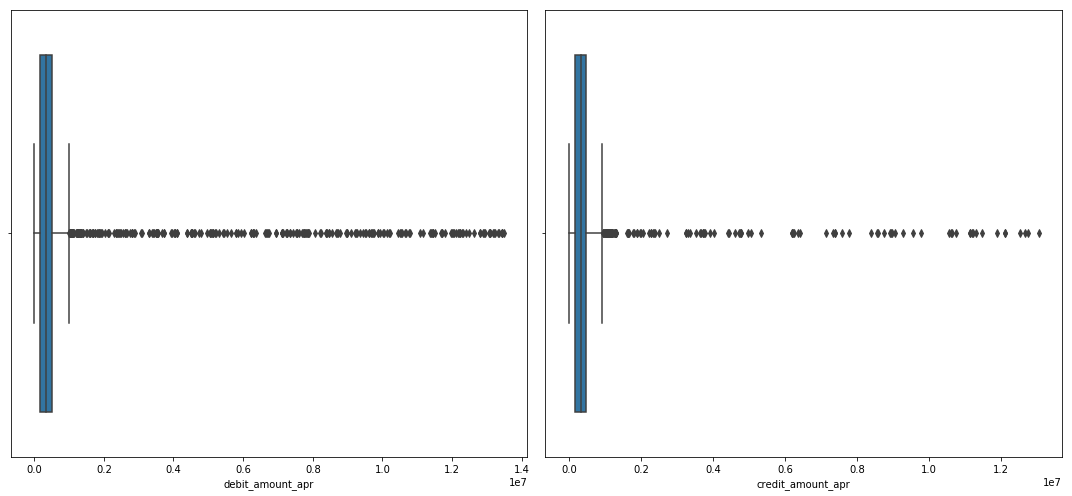

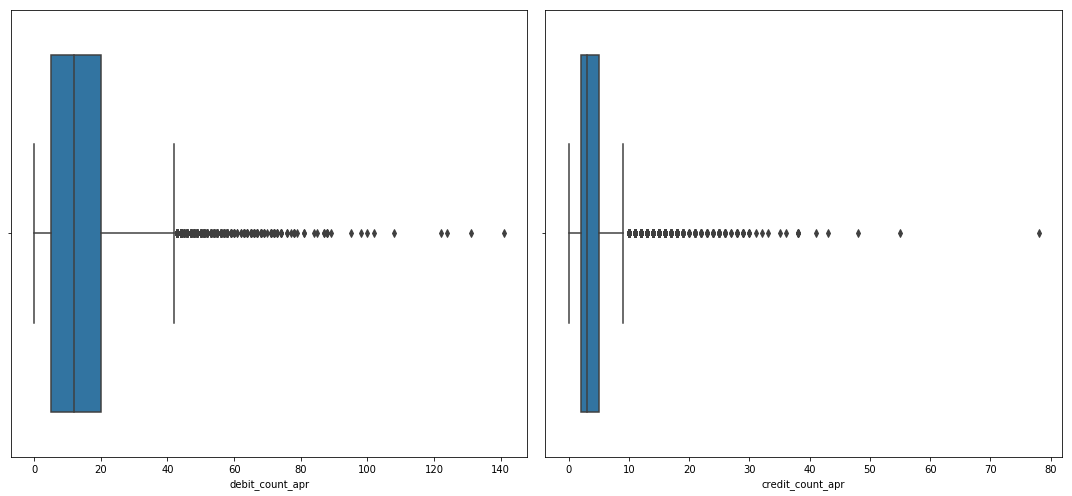

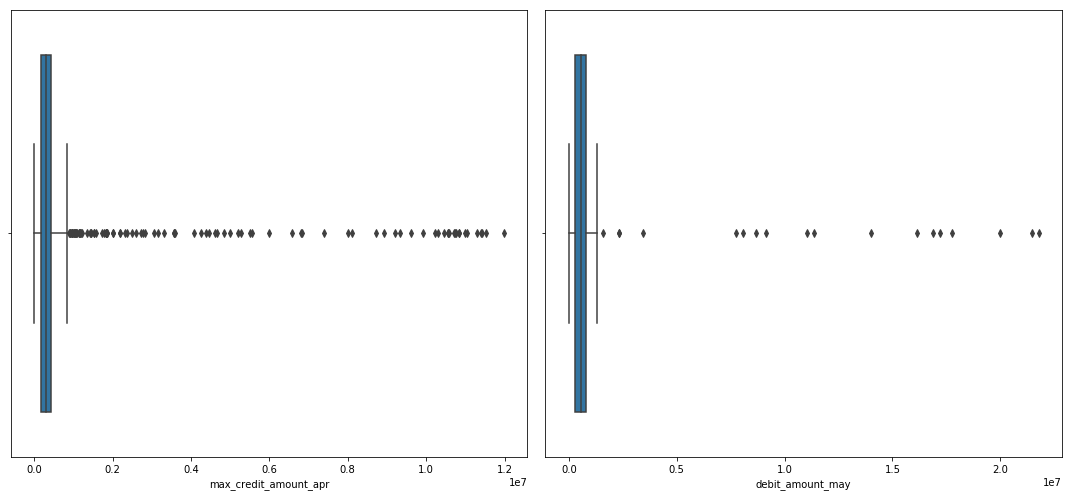

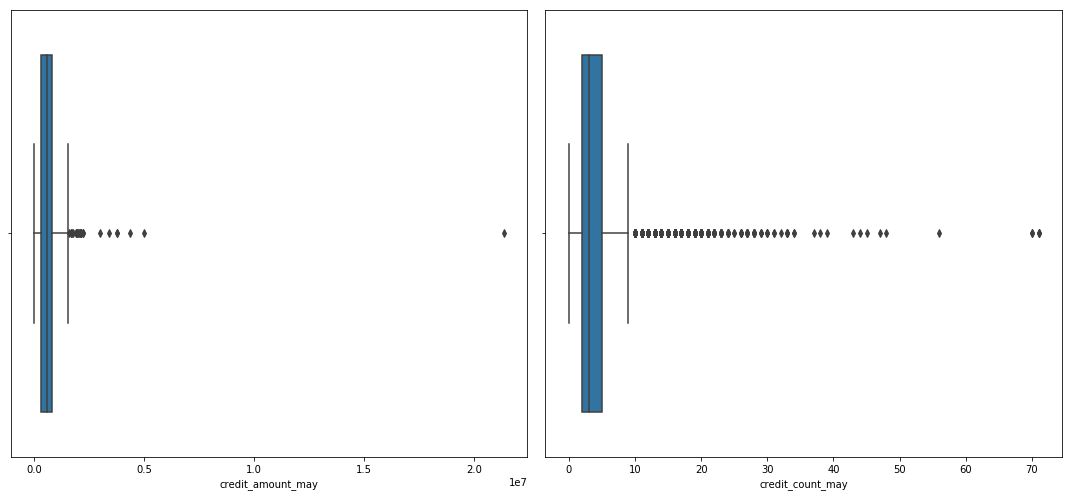

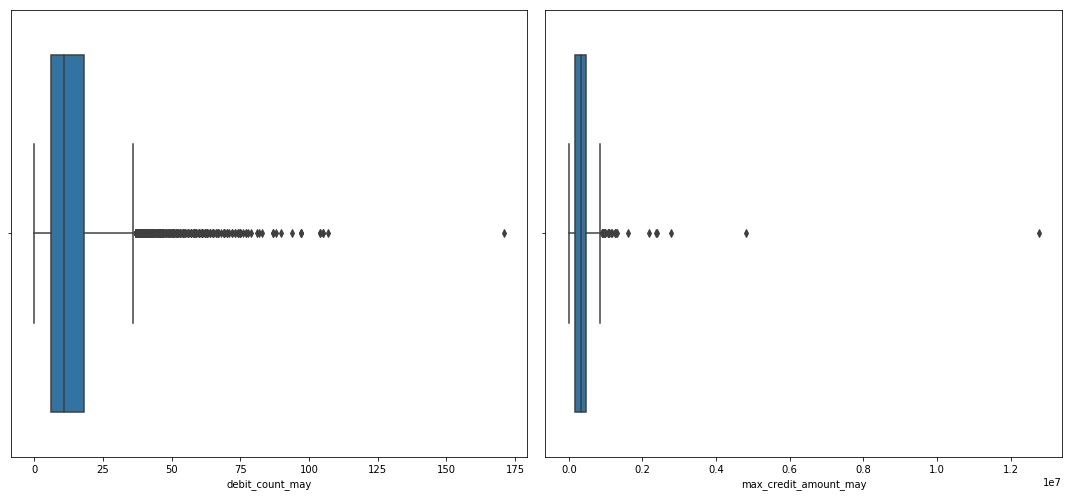

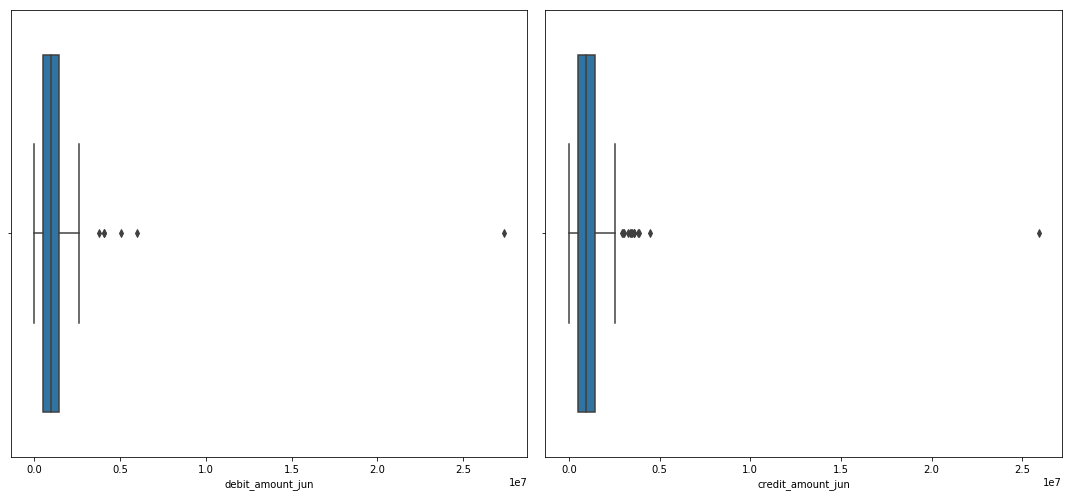

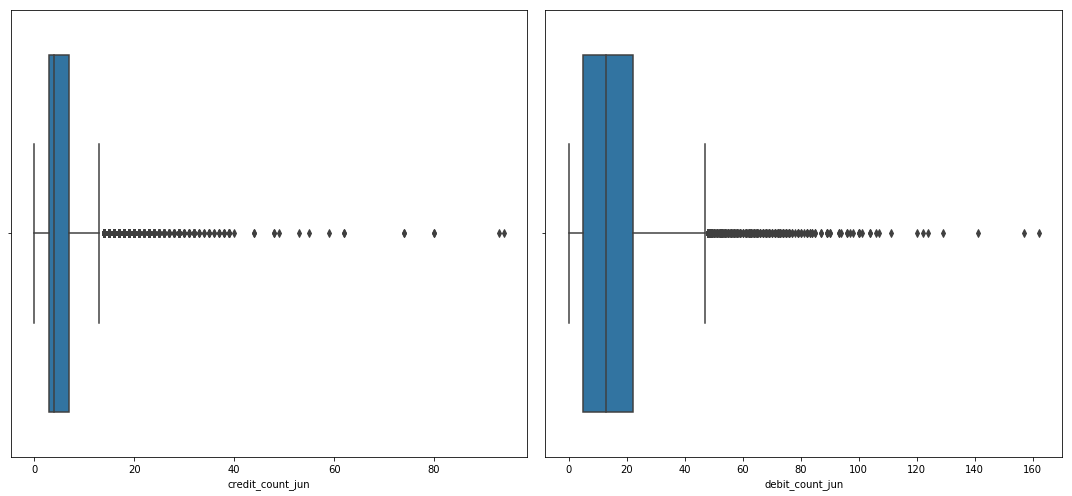

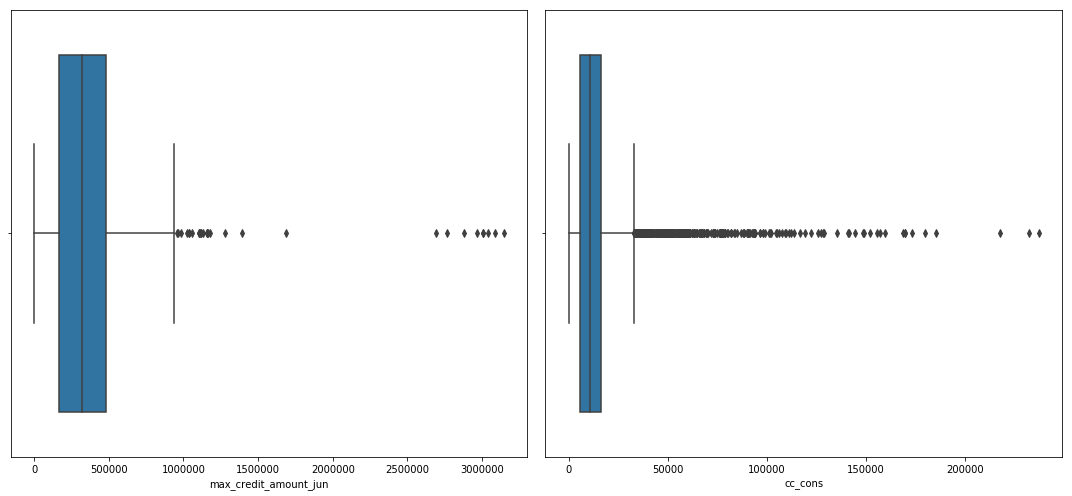

In [172]:
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(15,7))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])
    
plot_box_plots(df_fill_missing)

In [171]:
# def bivariate_analysis_categorical(dataframe,target):
#     categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
#     for i in range(0,len(categorical_columns),2):
#         if len(categorical_columns) > i+1:
#             plt.figure(figsize=(15,5))
#             plt.subplot(121)
#             sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
#             plt.xticks(rotation=90)
#             plt.subplot(122)            
#             sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
#             plt.xticks(rotation=90)
#             plt.tight_layout()
#             plt.show()


# bivariate_analysis_categorical(df,df['cc_cons'])

In [190]:
outliers = detect_outliers(df_fill_missing)
outliers =outliers[outliers['Number of Outliers'] > 0]
print(outliers)

         Feature Number of Outliers
2    dc_cons_apr               7152
3    dc_cons_may               7152
4    dc_cons_jun               5334
8   dc_count_apr               2931
9   dc_count_may               2296
10  dc_count_jun               1799


In [184]:
lower_bound = 0.1
upper_bound = 0.95
res = df.dc_cons_apr.quantile([lower_bound,upper_bound])
res

0.10     9295.268028
0.95    36501.756509
Name: dc_cons_apr, dtype: float64

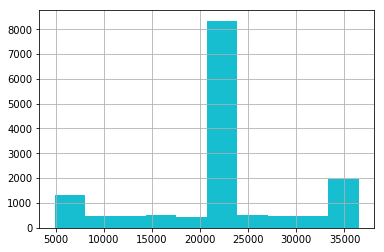

In [194]:
df_fill_missing.dc_cons_apr.hist()

In [196]:
df.dc_cons_apr.isnull().sum()

0

In [173]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(df_fill_missing)

# Checking for outliers after applying winsorization
detect_outliers(dataframe)

,Feature,Number of Outliers
0,age,0
1,region_code,0
2,dc_cons_apr,7152
3,dc_cons_may,7152
4,dc_cons_jun,5334
5,cc_count_apr,0
6,cc_count_may,0
7,cc_count_jun,0
8,dc_count_apr,2931
9,dc_count_may,2296


In [174]:
df_fill_missing.skew()

age                      0.380501
region_code             -0.577238
dc_cons_apr             -0.342569
dc_cons_may             -0.342569
dc_cons_jun             -0.787781
cc_count_apr             0.673453
cc_count_may             0.655739
cc_count_jun             0.003081
dc_count_apr             1.591225
dc_count_may             1.428479
dc_count_jun             1.362893
card_lim                 0.872658
debit_amount_apr        -0.061562
credit_amount_apr       -0.051895
debit_count_apr          0.406714
credit_count_apr         0.618344
max_credit_amount_apr   -0.045996
debit_amount_may        -0.078673
credit_amount_may       -0.071319
credit_count_may         0.704044
debit_count_may          0.581754
max_credit_amount_may   -0.072269
debit_amount_jun        -0.074235
credit_amount_jun       -0.044168
credit_count_jun         0.725554
debit_count_jun          0.500947
max_credit_amount_jun   -0.059442
cc_cons                 -0.043140
dtype: float64